In [18]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sn
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score

In [2]:
df=pd.read_csv('Data/Iris.csv')
df.head()

,Id,sepal-length,sepal-width,petal-length,petal-width,target
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.columns

Index(['Id', 'sepal-length', 'sepal-width', 'petal-length', 'petal-width',
       'target'],
      dtype='object')

In [4]:
data=df[['sepal-length', 'sepal-width', 'petal-length', 'petal-width']]
y=df['target']

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [6]:
df.describe()

,Id,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
x_original=data.copy()

In [8]:
scaler=StandardScaler()

In [9]:
x=scaler.fit_transform(x_original)

In [10]:
# Apply PCA

In [11]:
pca=PCA()

In [12]:
pca.fit(x)

PCA()

In [13]:
pca.components_

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [ 0.37231836,  0.92555649,  0.02109478,  0.06541577],
       [ 0.72101681, -0.24203288, -0.14089226, -0.6338014 ],
       [-0.26199559,  0.12413481,  0.80115427, -0.52354627]])

In [14]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

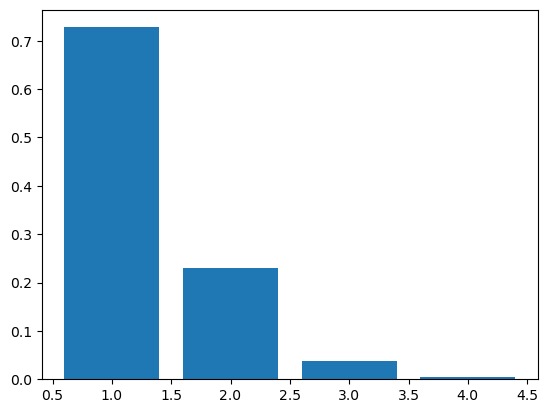

In [15]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_)
plt.show()

In [16]:
var_cum=np.cumsum(pca.explained_variance_ratio_)
var_cum

array([0.72770452, 0.95800975, 0.99484807, 1.        ])

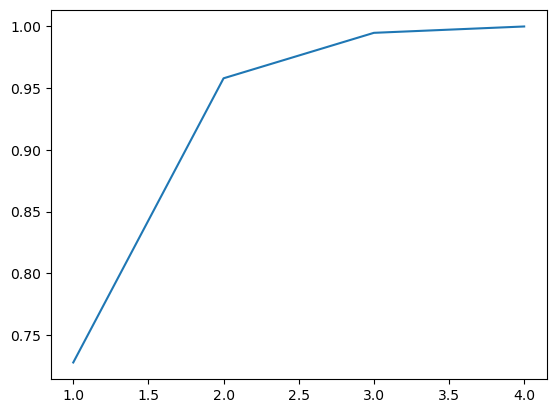

In [17]:
plt.plot(range(1,len(var_cum)+1),var_cum)
plt.show()

In [18]:
pc2=PCA(n_components=2)

In [19]:
new=pc2.fit_transform(x)

In [20]:
df=pd.DataFrame(new,columns=['PC1','PC2'])
df

,PC1,PC2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
...,...,...
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362


In [21]:
df_final=pd.concat([df,y],axis=1)
df_final.head()

,PC1,PC2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


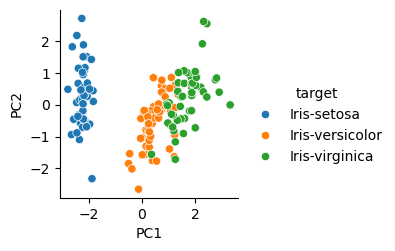

In [22]:
sn.pairplot(data=df_final,x_vars="PC1",y_vars="PC2",hue='target')
plt.show()

In [23]:
x=df_final[["PC1","PC2"]]
le=LabelEncoder()
y=le.fit_transform(df_final['target'])

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_text=train_test_split(x,y,test_size=0.2)

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
lr=LogisticRegression()

In [27]:
lr.fit(X_train,y_train)

LogisticRegression()

In [28]:
y_pred=lr.predict(X_test)


In [29]:
from sklearn.metrics import classification_report,accuracy_score,mean_squared_error

In [30]:
score=lr.score(X_test,y_text)
score

0.9

In [31]:
cr=classification_report(y_text,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.67      0.80      0.73         5
           2       0.92      0.86      0.89        14

    accuracy                           0.90        30
   macro avg       0.86      0.89      0.87        30
weighted avg       0.91      0.90      0.90        30



In [32]:
# LDA Linear Discriminant Analysis

In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [35]:
df1=pd.read_csv("Data/Iris.csv")
x = df1[['sepal-length', 'sepal-width', 'petal-length', 'petal-width']]
y = df1['target']

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

In [36]:
lda = LinearDiscriminantAnalysis(n_components=2)  # number of class -1
X_train_lda = lda.fit_transform(x_train, y_train)
X_test_lda = lda.transform(x_test)

In [40]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_lda, y_train)

LogisticRegression()

In [41]:
# Predictions & evaluation
y_pred = log_reg.predict(X_test_lda)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [ ]:
#AdaBoost

In [4]:
df=pd.read_csv('Data/Iris.csv')
df.columns

Index(['Id', 'sepal-length', 'sepal-width', 'petal-length', 'petal-width',
       'target'],
      dtype='object')

In [5]:
y=df['target']
le=LabelEncoder()
y=le.fit_transform(y)

In [6]:
x=df[['sepal-length', 'sepal-width', 'petal-length', 'petal-width']]
sc=StandardScaler()
x=sc.fit_transform(x)

In [9]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [11]:
modelbase = DecisionTreeClassifier(max_depth=1)

In [12]:
adaboostmodel = AdaBoostClassifier(
    estimator=modelbase,
    n_estimators=50
)

In [13]:
adaboostmodel.fit(X_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1))

In [14]:
y_pred_ada=adaboostmodel.predict(X_test)

In [17]:
cr=classification_report(y_test,y_pred_ada)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.91      0.95        11
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [19]:
print(accuracy_score(y_test,y_pred_ada))

0.9666666666666667
